<font size=7> Latencies Analysis

In [1]:
import pickle
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, plot_latency_dist_hist, plot_latency_angle_hist, \
                                 plot_cross_sttc_pairs
from human_hip.animate import animate_latencies
import human_hip.spike_data as spike_data

In [2]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


In [3]:
#good_pairs = curate_latencies(sd)
# good_pairs = curate_latencies(sd)
# with open( 'curate_latencies_good_pairs.pkl' , 'wb') as my_file:
#    pickle.dump(good_pairs, my_file)
#load pickled data
with open( 'curate_latencies_good_pairs.pkl' , 'rb') as my_file:
    good_pairs = pickle.load(my_file)
print(len(good_pairs))

466


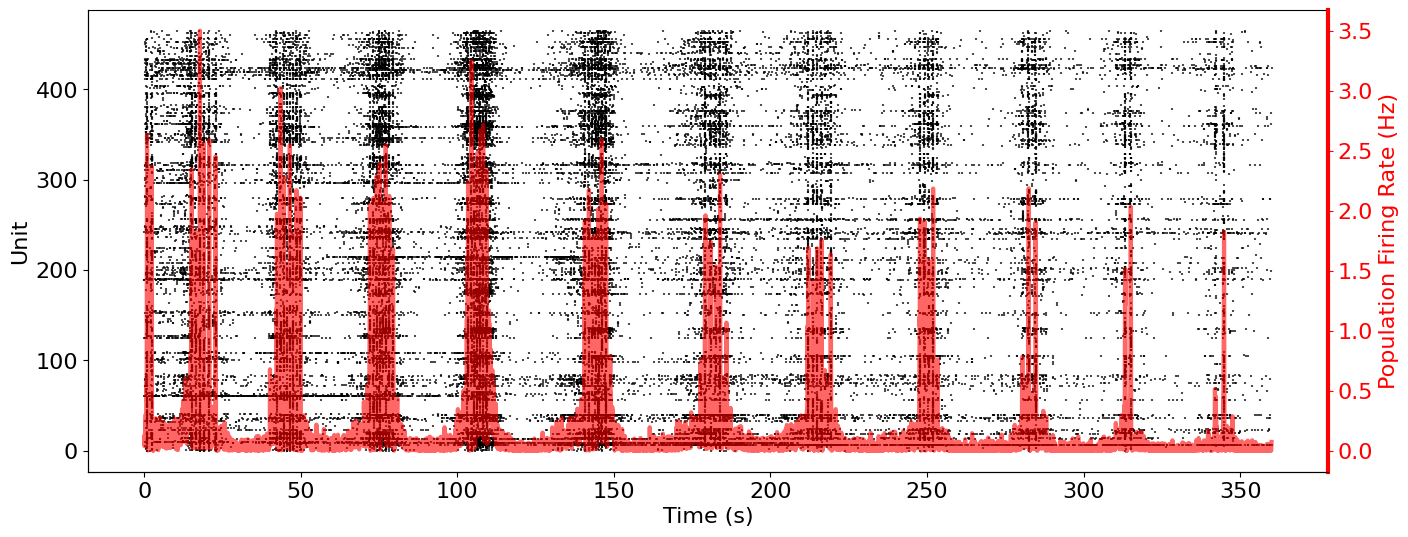

In [4]:
plot_raster_latency_pairs( sd, good_pairs )

In [19]:
plot_raster_latency_pairs

<function human_hip.spike_data.plot_latencies.plot_raster_latency_pairs(sd, pairs, xlim=None)>

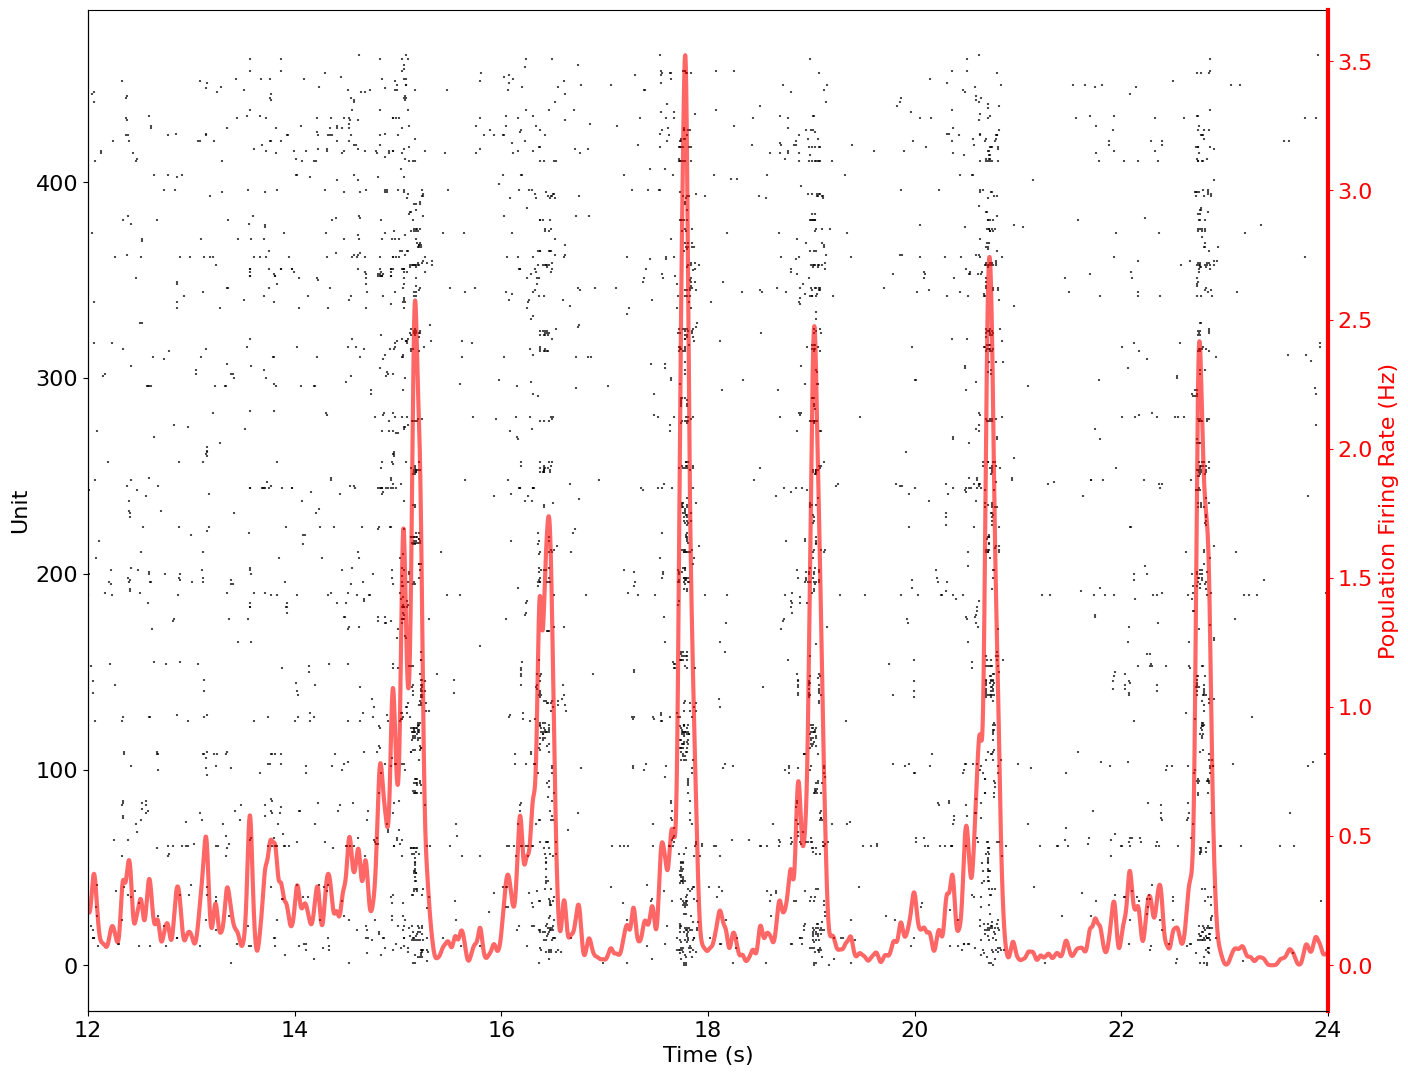

In [23]:
plot_raster_latency_pairs( sd, good_pairs, xlim=(12,24), size=(16,13) )

540 um -- average pair distance
549 um -- average latency distance


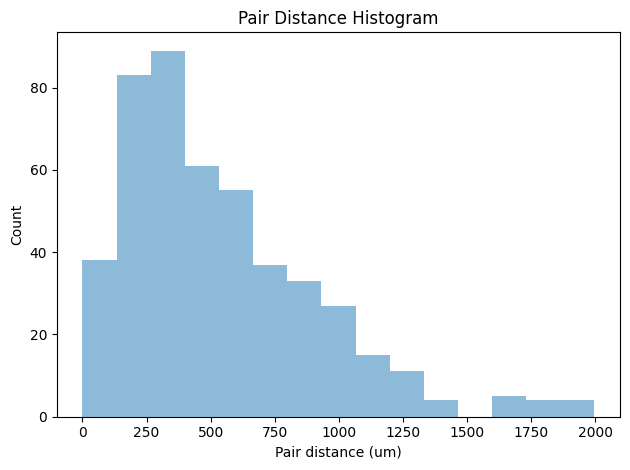

In [8]:
plot_latency_dist_hist(sd, good_pairs)

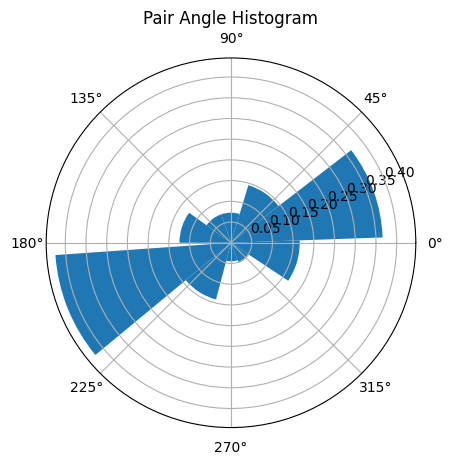

In [7]:
plot_latency_angle_hist( sd, good_pairs)

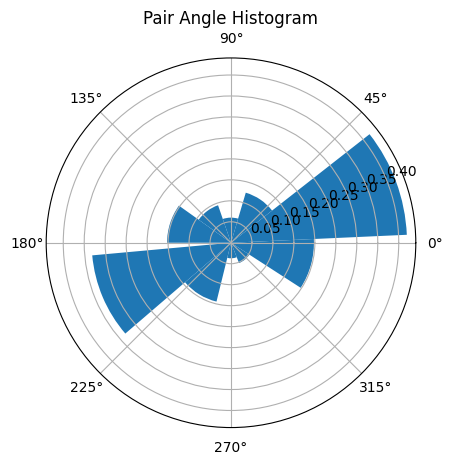

In [12]:
plot_latency_angle_hist( sd, good_pairs, by_firing_rate=True)

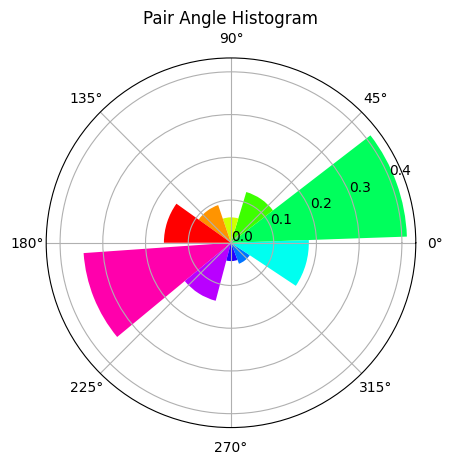

In [5]:
plot_latency_angle_hist( sd, good_pairs, by_firing_rate=True)

# Vector Plots

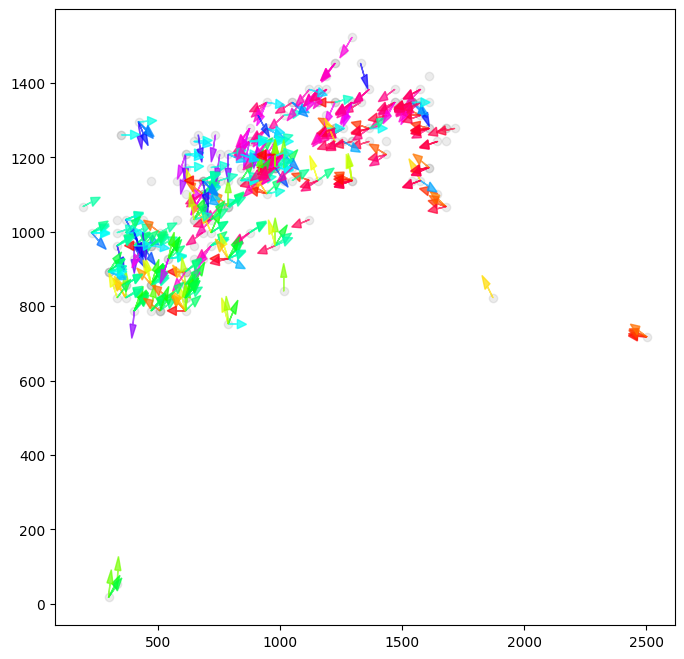

In [5]:
plot_vector_layout( sd, good_pairs)

/tmp/ipykernel_1464/3989538213.py:14: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():
/tmp/ipykernel_1464/3989538213.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')


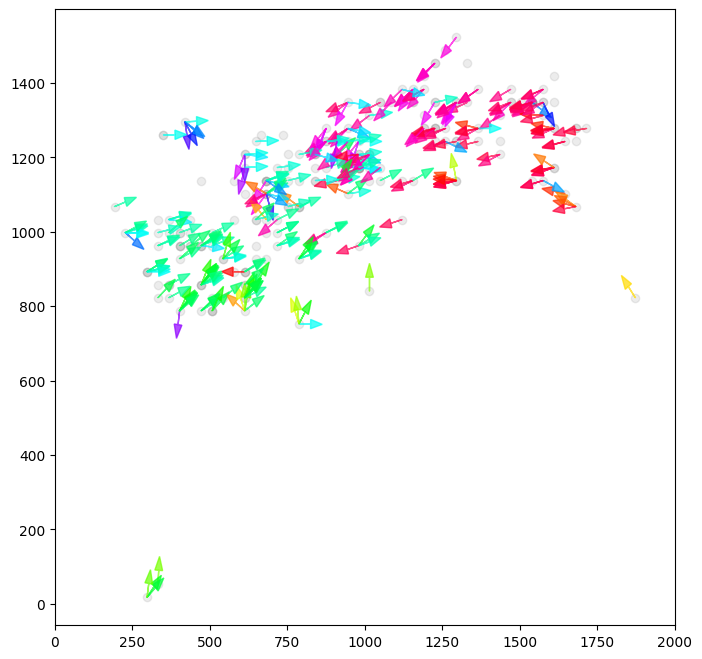

In [11]:
plot_vector_layout( sd, good_pairs, min_dist=300, xlim=(0,2000) )

/tmp/ipykernel_24052/2995960396.py:28: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():
/tmp/ipykernel_24052/2995960396.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')


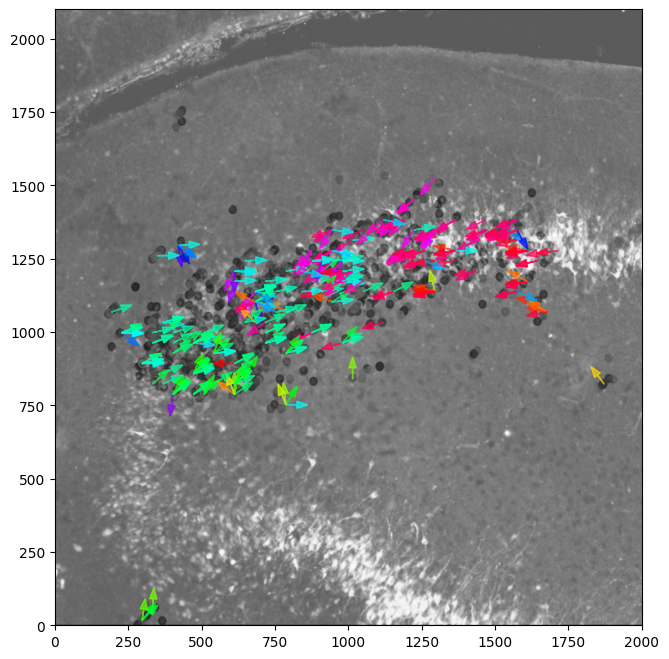

In [16]:
plot_vector_layout( sd, good_pairs, min_dist=300, xlim=(0,2000), image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw.jpeg" )

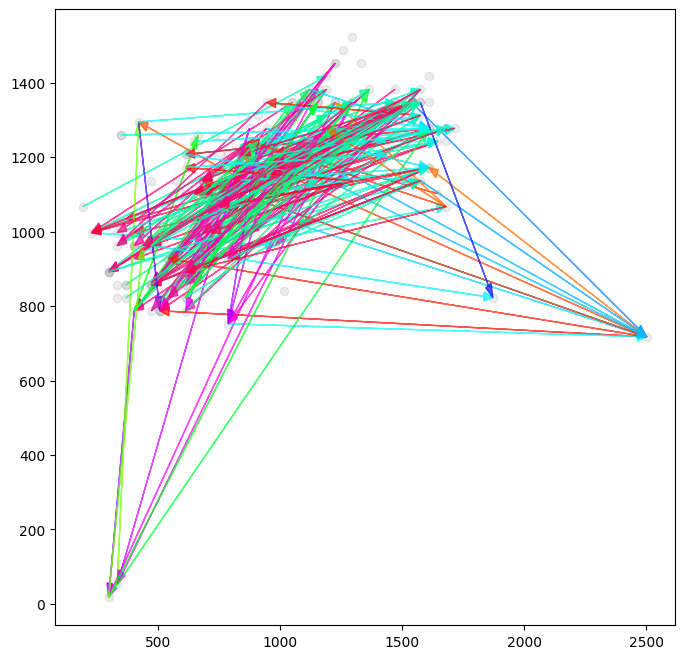

In [13]:
plot_vector_layout( sd, good_pairs, min_dist=500, normalize=False )

# Make Animations

In [15]:
animate_latencies(plot_vector=True, ms_range=range(0,1000) )

<function human_hip.animate.animate_latency_pairs.animate_latencies(sd, pairs, movie_range_ms=None, frame_interval_ms=500, directed=True, directed_backwards=False, filename='latencies.mp4', latency_ms_cutoff_low=1, latency_ms_cutoff_high=15, plot_vector=False, min_dist=0)>

25781 latency events occured in total spikedata
Making animation of 3.008 minutes
Saved animation to media/latencies.mp4


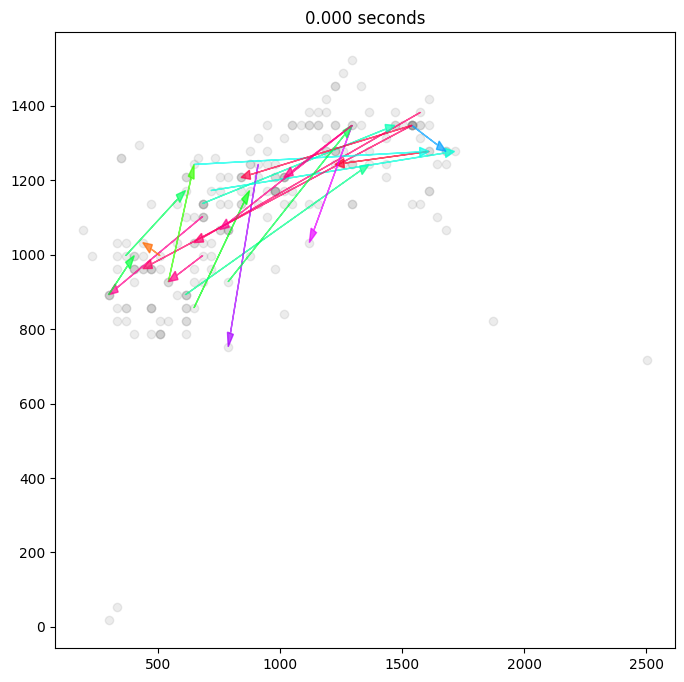

In [14]:
animate_latencies(sd, good_pairs, filename="media/latencies.mp4" )

1860 latency events occured in total spikedata
668 latency events occured above 500 um distance
Making animation of 2.283 minutes
Saved animation to media/latencies_mindist500.mp4


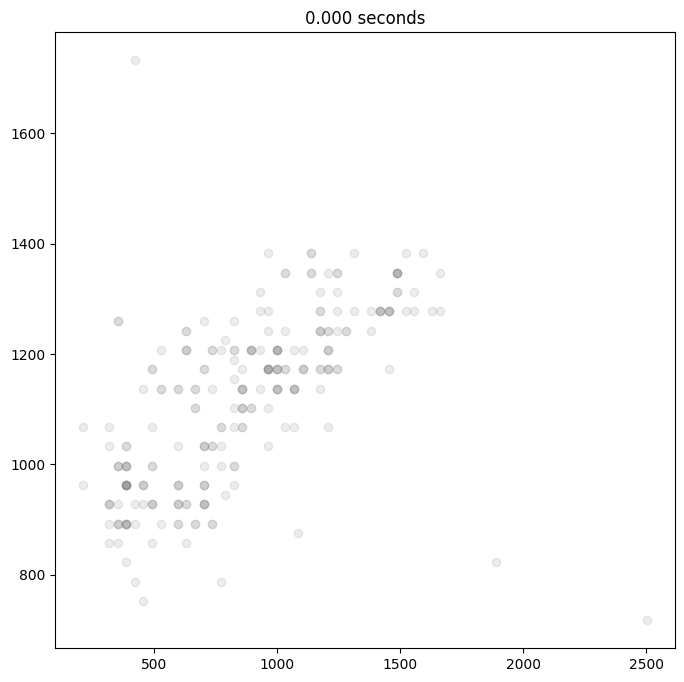

In [13]:
animate_latencies(sd, good_pairs,  filename='media/latencies_mindist500.mp4', min_dist=500 )

In [ ]:
# animate_latencies(sd, pairs, movie_range_ms=None, frame_interval_ms=500, directed=True, filename="latencies.mp4",
#                       latency_ms_cutoff_low=0, latency_ms_cutoff_high=15 ):